## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import time

## Import Data

In [2]:
columns = ['Year', 'Week Start', 'Week End', 'Section', 'Number', 'Headline', 'Body Text']
articles_df = pd.read_csv('articles/articles_db.csv', names=columns)

In [3]:
articles_df.head(100)

,Year,Week Start,Week End,Section,Number,Headline,Body Text
0,2000,2000-01-03,2000-01-09,business,0,There's no time to waste,"Over the past few months, President Clinton ha..."
0,2000,2000-01-03,2000-01-09,business,1,Ford staff threaten strike,Leaders of salaried staff at Ford are threaten...
0,2000,2000-01-03,2000-01-09,business,2,There's no time to waste,"Over the past few months, President Clinton ha..."
0,2000,2000-01-03,2000-01-09,business,3,Cybersquatters with an eye for domain chance,"What's in a domain name? Loadsamoney, apparent..."
0,2000,2000-01-03,2000-01-09,business,4,Clicks and mortar leave property crumbling away,The property market looks in pretty good healt...
0,2000,2000-01-03,2000-01-09,business,5,Labour isn't working hard enough,Few people I know would dissent from the propo...
0,2000,2000-01-03,2000-01-09,business,6,Dunces excel in the knowledge economy,While all the fashionable blather is of a know...
0,2000,2000-01-03,2000-01-09,business,7,Russia Y2K bill 'shows West overreacted',Russia spent just $200 million on preparing fo...
0,2000,2000-01-03,2000-01-09,business,8,Briefcase,"BUY... Domino's Pizza company, which last week..."
0,2000,2000-01-03,2000-01-09,business,9,TransTec duo kept silent on £11m claim,"Two former executive directors of TransTec, th..."


In [4]:
articles_df.shape

(88745, 7)

## Filter articles based on relevance to exchange rate

In [5]:
relevant_words = np.genfromtxt('Keywords.txt', dtype='str')

In [6]:
def find_relevant(text, n):
    text = str(text)
    num_relevant_words = [word for word in relevant_words if ((' '+word+' ') in text)]
    if len(num_relevant_words) > n:
        return True
    else:
        return False

## Number of relevant articles per week

(0, 50)

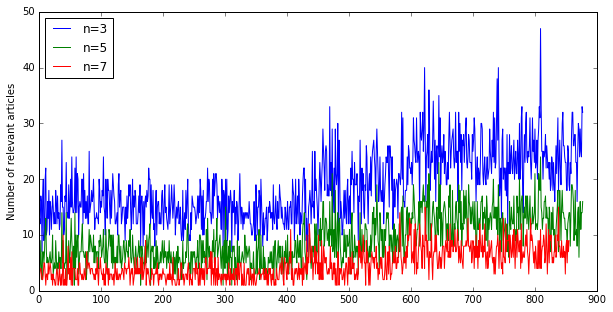

In [7]:
text = articles_df['Body Text'].values[0]

plt.figure(figsize=(10,5))
for n in [3,5,7]:
    relevant_articles = [find_relevant(text, n) for text in articles_df['Body Text'].values]
    relevant_df = articles_df[relevant_articles]
    weekly_articles = relevant_df.groupby('Week Start').size().reset_index()
    plt.plot(weekly_articles[0], label='n='+str(n),)
    
plt.legend(loc='best')
plt.ylabel('Number of relevant articles')
axes = plt.gca()
axes.set_ylim([0,50])

## Look at the number of relevant articles per section:

(0, 30)

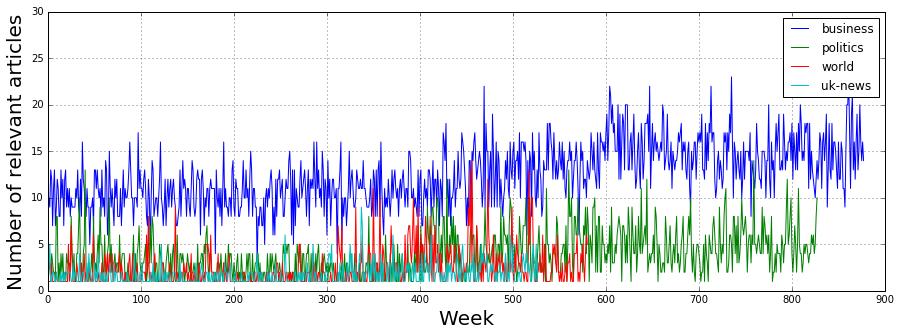

In [8]:
n = 3
relevant_articles = [find_relevant(text, n) for text in articles_df['Body Text'].values]
relevant_df = articles_df[relevant_articles]
articles_per_section = relevant_df.groupby(['Week Start', 'Section']).size().reset_index()

plt.figure(figsize=(15,5))
for section in articles_per_section['Section'].unique():
    articles_count = articles_per_section[articles_per_section['Section'] == section]
    articles_count.head()
    plt.plot(range(0, len(articles_count[0])), articles_count[0], label=section)
plt.xlabel('Week', fontsize=20)
plt.ylabel('Number of relevant articles', fontsize=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.grid(True)
plt.legend()
axes = plt.gca()
axes.set_ylim([0,30])

# Sentiment Analysis

In [9]:
# Source code for sentinet: http://www.nltk.org/_modules/nltk/corpus/reader/sentiwordnet.html
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import stopwords

In [10]:
# A simple function to obtain the overall sentimate of a text chunk
# Method: tokenise the text chunk, obtain the sentiment score of each token, then take mean average.
# Note: you may need to separately install sentiwordnet: nltk.download('sentiwordnet')

## synsets based on context
## phrases/tokens 

## classify words as noun/adjectives

# unsupervised split between adjectives 

def simple_sentiment(text_chunk):
    cumulative_pos_sentiment = 0
    cumulative_neg_sentiment = 0
    index = 0
    
    # Tokenizing the sample text
    tokens=nltk.word_tokenize(text_chunk)
    # Removing words of lenght 2 or less
    tokens = [i for i in tokens if len(i)>=3]
    # remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # a/n/v/r represent adjective/noun/verb/adverb respectively. They are used to index the sentinet dictionary.
    for i in tokens:
        if len(list(swn.senti_synsets(i, 'a')))>0:
            cumulative_pos_sentiment += list(swn.senti_synsets(i, 'a'))[0].pos_score()
            cumulative_neg_sentiment += list(swn.senti_synsets(i, 'a'))[0].neg_score()
            index +=1
        elif len(list(swn.senti_synsets(i, 'n')))>0:
            cumulative_pos_sentiment += list(swn.senti_synsets(i, 'n'))[0].pos_score()
            cumulative_neg_sentiment += list(swn.senti_synsets(i, 'n'))[0].neg_score()
            index +=1
        elif len(list(swn.senti_synsets(i, 'v')))>0:
            cumulative_pos_sentiment += list(swn.senti_synsets(i, 'v'))[0].pos_score()
            cumulative_neg_sentiment += list(swn.senti_synsets(i, 'v'))[0].neg_score()
            index +=1
        elif len(list(swn.senti_synsets(i, 'r')))>0:
            cumulative_pos_sentiment += list(swn.senti_synsets(i, 'r'))[0].pos_score()
            cumulative_neg_sentiment += list(swn.senti_synsets(i, 'r'))[0].neg_score()
            index +=1
        
    avg_pos_sentiment = cumulative_pos_sentiment / float(index)
    avg_neg_sentiment = cumulative_neg_sentiment / float(index)
    
#     print('Positive sentiment:',avg_pos_sentiment)
#     print('Negative sentiment:',avg_neg_sentiment)
    
    return (avg_pos_sentiment,avg_neg_sentiment)

In [11]:
sample_text = 'There\'s no time to waste,"Over the past few months, President Clinton has lost few opportunities to sing the praises of his favourite book. In November, he told a conference attended by Tony Blair that it was no longer necessary to choose between growth and environment. He took as evidence Natural Capitalism, The Next Industrial Revolution (Paul Hawken and Amory and Hunter Lovins, Earthscan, pounds 18.99), which \'proves beyond argument that there are presently available technologies, and those just on the horizon, which will permit us to get richer by cleaning, not by spoiling, the environment. This is a huge deal,\' Clinton said.   It\'s a suitably millennial claim. The authors argue that \'capitalism, as practised, is a financially profitable, nonsustainable aberration in human development... [which] does not fully conform to its own accounting principles. It liquidates its capital and calls it income. It neglects to assign any value to the largest stocks of capital it employs, the natural resources and living systems, as well as the social and cultural systems that are the basis of human capital.\'   Companies, as has been well said, are brilliant externalising machines, pocketing the profits and shunting the costs of their enterprise on to the collectivity. Thus, the NHS pays for the profits of big tobacco, and the Government subsidises cars by building roads. Put it another way, business is a free rider on the environment and the services it provides, services which have been tentatively valued by Nature magazine at $36 trillion annually, roughly the same as world GDP.   The reason business is so profligate with the the environment (the \'natural capital\' of the book) is that its goods are assumed by economists to be free and infinitely substitutable. So they are uncosted. But in reality they are not free. They are produced by the earth\'s 3.8-billion-year store of natural capital which, as the authors rehearse with hair-raising thoroughness, is being eroded so fast that by the end of this century there will be little left. And there is no conceivable substitute, for example, for the biosphere\'s ability to produce oxygen.   The authors manage to recast this rush to disaster as a story with a (potentially) happier ending. Their grounds for optimism are partly familiar American technological optimism, if natural resources were treated as scarce and expensive, then nanotechnology and biotechnology could multiply four or even tenfold the outputs from today\'s inputs. Hence Clinton\'s enthusiasm.   But more crucial to the project is a complete mental flip of what an \'output\' consists of (as Edwin Land once said, a great idea is often \'not having a new thought but stopping having an old one\').   At present, it is entirely conceivable that one-quarter or even half of the GDP of advanced countries makes not value but waste. Most industrial processes, and the economy as a whole, are inefficient , at best achieving 10 per cent of their potential likewise their products. A car uses just 1 per cent of the energy it burns to propel the driver, the rest to warm the atmosphere, deafen pedestrians and shift ponderous steel boxes between traffic jams.   Moreover, waste is cumulative, so an increasing income has to be spent on alleviating growth\'s byproducts, pollution, traffic accidents and congestion, crime. Hence the phenomenon of uneconomic growth, where increases in nominal wealth produce no net gain in quality of life or standard of living: in real terms 80 per cent of Americans are no better off than they were in 1979.   However, the grossness of the waste is, say the authors, also a measure of the huge potential for improvement if the spiral changed to virtuous. The secret is taking a systems view in which it is always more expensive to get rid of waste than to design it out in the first place. Given the wastefulness of most current systems, improvements of 10 to 100 times in overall efficiency are possible even with existing technology.   Much of what the Lovins and Hawken propose is not new. Frances Cairncross wrote about costing the earth 10 years ago, and Richard Schonberger coined the term \'frugal manufacturing\' in the 1980s. What is new is the way these ideas are brought together in a systems approach to business and the environment, and the coopting of markets as the mechanism which can be used to turn things around.   There is some irony here, of course. The greatest obstacle to \'natural capitalism\' in practice will be the vested interests and special pleading of those most vociferous champions of capitalist orthodoxy, US companies, which emerge from this book the masters of the perverse, not to mention grotesque, hidden subsidy, whether of agriculture, cars, or their wealthy executives.   Persuading them to confront their own bad faith will be no easy matter. But, as someone once said, the economy is a wholly-owned subsidiary of the environment, and time is running out for the parent to bring it to heel.'
simple_sentiment(sample_text)

(0.0845771144278607, 0.04695273631840796)

In [12]:
n = 3
relevant_articles = [find_relevant(text, n) for text in articles_df['Body Text'].values]
relevant_df = articles_df[relevant_articles]
weeks = relevant_df['Week Start'].unique()

avg_weekly_pos_score = np.zeros((len(weeks), 1))
avg_weekly_neg_score = np.zeros((len(weeks), 1))
avg_weekly_pos_minus_neg_score = np.zeros((len(weeks), 1))

In [13]:
weeks = relevant_df['Week Start'].unique()

for i, week in enumerate(weeks):
    articles = relevant_df[relevant_df['Week Start'] == week]['Body Text']
    num_articles = articles.shape[0]
    pos_score = 0
    neg_score = 0
    for article in articles:
        pos, neg = simple_sentiment(article)
        pos_score += pos
        neg_score += neg
    avg_weekly_pos_score[i] = (pos_score/float(num_articles))
    avg_weekly_neg_score[i] = (neg_score/float(num_articles))
    avg_weekly_pos_minus_neg_score[i] = avg_weekly_pos_score[i] - avg_weekly_neg_score[i]
    if (i%10 == 0):
        print('Week: ', week, 'Postive: ', avg_weekly_pos_score[i][0], 'Negative: ', avg_weekly_neg_score[i][0])

Week:  2000-01-03 Postive:  0.070247292798 Negative:  0.0528722433901
Week:  2000-03-13 Postive:  0.0658073567332 Negative:  0.0521062053688
Week:  2000-05-22 Postive:  0.0653498060063 Negative:  0.0470417799244
Week:  2000-07-31 Postive:  0.0623012359218 Negative:  0.053896961167
Week:  2000-10-09 Postive:  0.0616461154479 Negative:  0.0443163230379
Week:  2000-12-18 Postive:  0.0575619986913 Negative:  0.0559789036546
Week:  2001-02-26 Postive:  0.0650370416063 Negative:  0.0542495718371
Week:  2001-05-07 Postive:  0.0647627400464 Negative:  0.0497860663912
Week:  2001-07-16 Postive:  0.0616574453781 Negative:  0.0550657019294
Week:  2001-09-24 Postive:  0.0590427462749 Negative:  0.0602430461482
Week:  2001-12-03 Postive:  0.0645236698043 Negative:  0.0612511105347
Week:  2002-02-11 Postive:  0.0626446311006 Negative:  0.0577428083685
Week:  2002-04-22 Postive:  0.0589347996625 Negative:  0.0545471878205
Week:  2002-07-01 Postive:  0.0613698109972 Negative:  0.05814486571
Week:  200

### Plot of average weekly positive sentiments

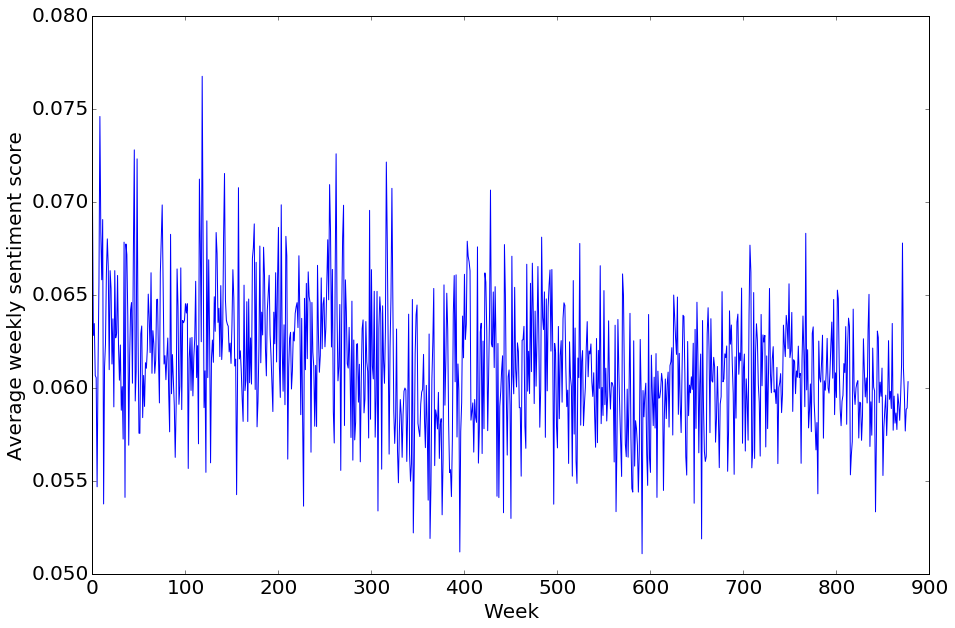

In [14]:
plt.figure(figsize=(15, 10))
plt.plot(avg_weekly_pos_score)
plt.xlabel('Week', fontsize=20)
plt.ylabel('Average weekly sentiment score', fontsize=20)

### Plot of average weekly negative sentiments

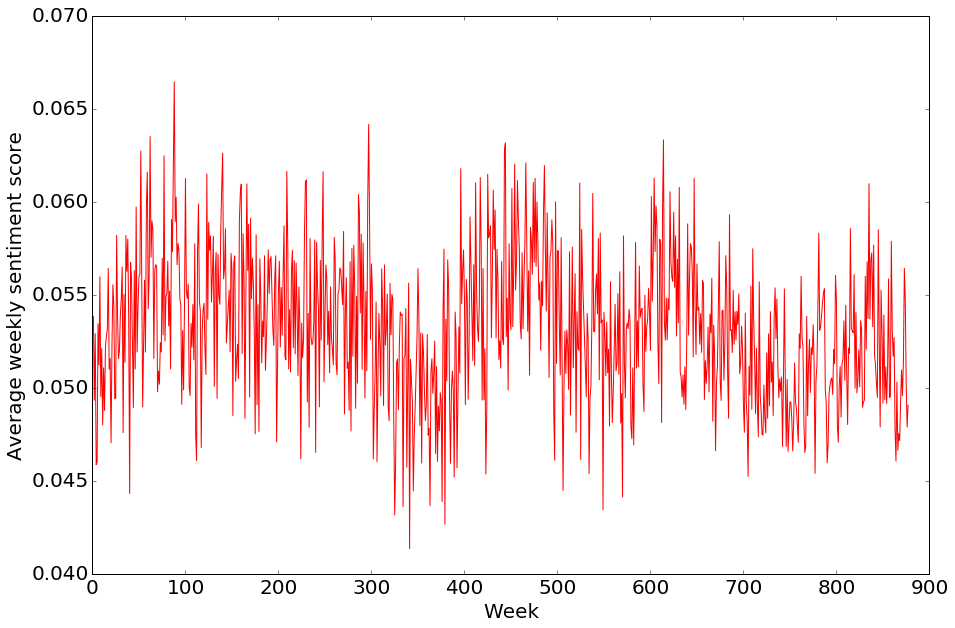

In [15]:
plt.figure(figsize=(15, 10))
plt.plot(avg_weekly_neg_score,'red')
plt.xlabel('Week', fontsize=20)
plt.ylabel('Average weekly sentiment score', fontsize=20)

### Plot of average weekly net postive (positive minus negative) sentiments

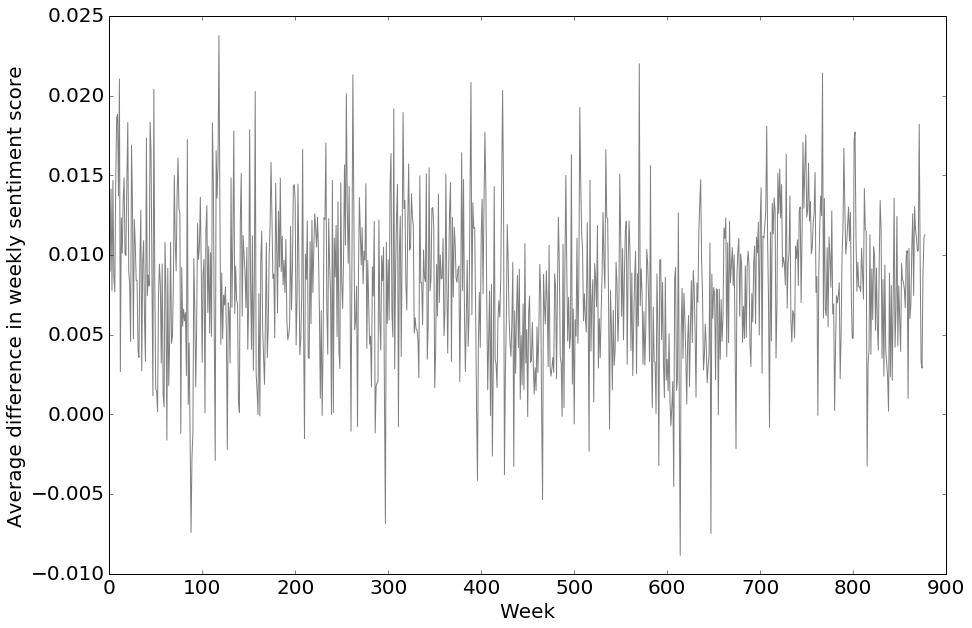

In [16]:
plt.figure(figsize=(15, 10))
plt.plot(avg_weekly_pos_minus_neg_score,'grey')
plt.xlabel('Week', fontsize=20)
plt.ylabel('Average difference in weekly sentiment score', fontsize=20)

### Including the exchange rate plots

In [17]:
daily_data = pd.read_csv('daily_rates.csv', skiprows=3, header=0)
monthly_data = pd.read_csv('monthly_rates.csv', skiprows=11, header=0)

In [18]:
daily_data['datetime'] = pd.to_datetime(daily_data['DATE'])
monthly_data['datetime'] = pd.to_datetime(monthly_data['DATE'])

daily_data['dayofweek'] = daily_data['datetime'].apply(lambda row: row.dayofweek)
weekly_data = daily_data[daily_data['dayofweek'] == 4]

In [37]:
timestamp_weeks = [pd.to_datetime(week) for week in weeks]

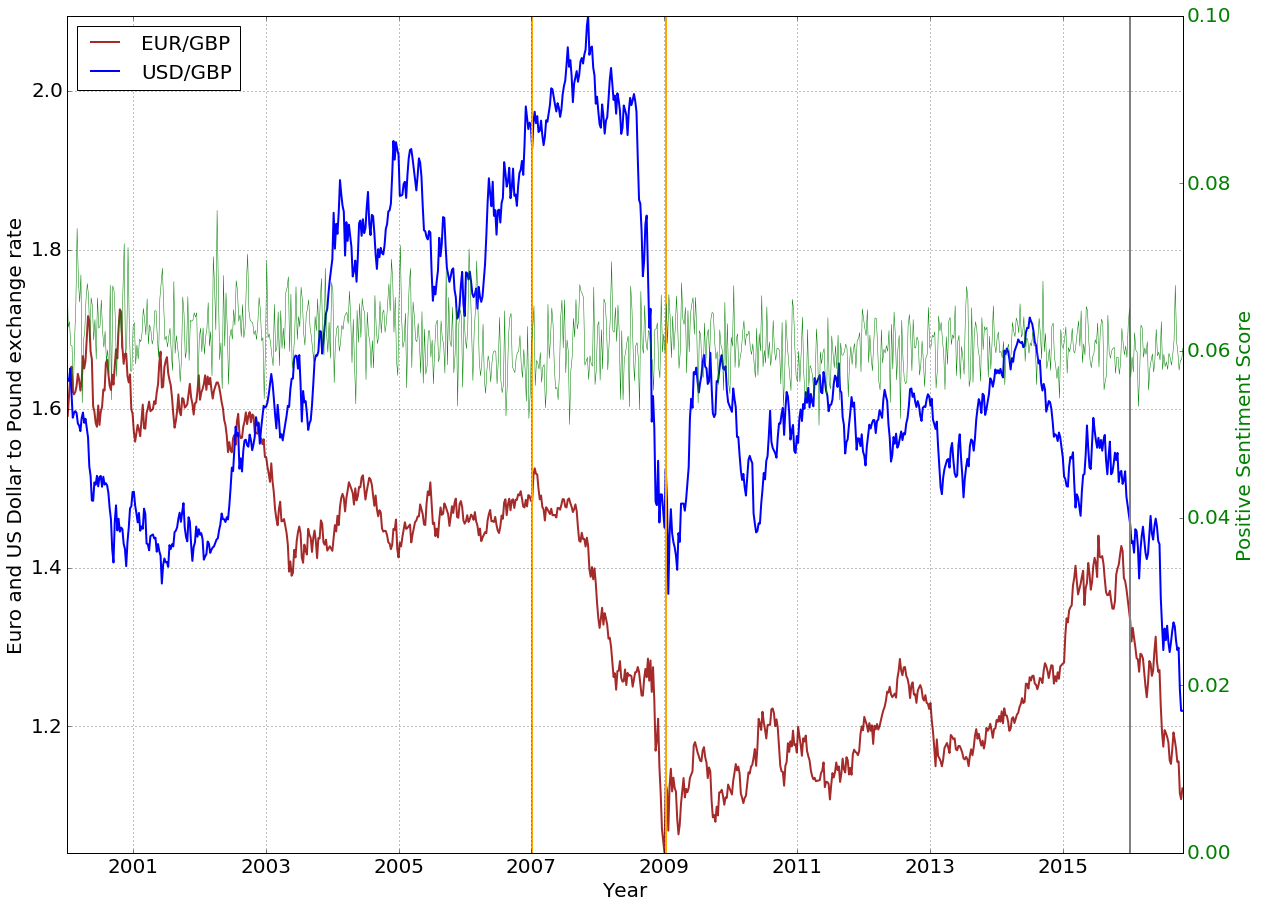

In [68]:
fig, ax1 = plt.subplots( figsize=(20,15))

ax1.plot(weekly_data['datetime'], weekly_data['XUDLERS'], 'brown', linewidth=2, label=str('EUR/GBP'))
ax1.plot(weekly_data['datetime'], weekly_data['XUDLUSS'], 'blue', linewidth=2, label=str('USD/GBP'))
ax1.legend(loc='best', fontsize=20)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Euro and US Dollar to Pound exchange rate', fontsize=20)
ax1.grid(True)
ax1.set_ylim([min(min(weekly_data['XUDLERS']),min(weekly_data['XUDLUSS'])),max(max(weekly_data['XUDLERS']),max(weekly_data['XUDLUSS']))])
ax1.axvline(x=datetime.datetime(2016,1,8), color='grey', linewidth=2)
ax1.axvline(x=datetime.datetime(2007,1,5), color='orange', linewidth=2)
ax1.axvline(x=datetime.datetime(2009,1,12), color='orange', linewidth=2)

ax2 = ax1.twinx()
ax2.plot(timestamp_weeks, avg_weekly_pos_score, 'green',linewidth=0.5, label = 'Average weekly positive score')
ax2.set_ylabel('Positive Sentiment Score', color='green',fontsize=20)
ax2.set_ylim([0.0,0.1])
for tl in ax2.get_yticklabels():
    tl.set_color('green')

plt.show()

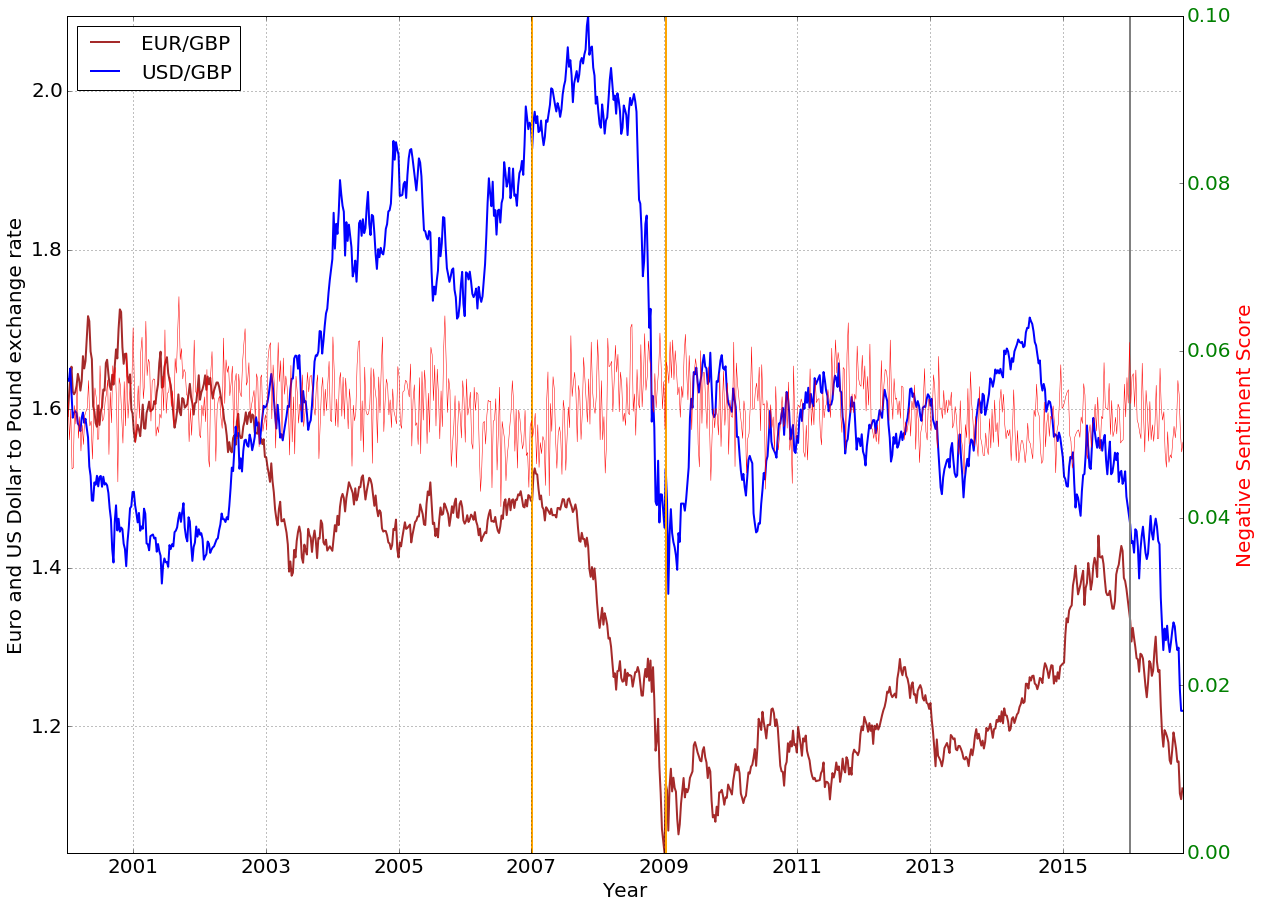

In [70]:
fig, ax1 = plt.subplots( figsize=(20,15))

ax1.plot(weekly_data['datetime'], weekly_data['XUDLERS'], 'brown', linewidth=2, label=str('EUR/GBP'))
ax1.plot(weekly_data['datetime'], weekly_data['XUDLUSS'], 'blue', linewidth=2, label=str('USD/GBP'))
ax1.legend(loc='best', fontsize=20)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Euro and US Dollar to Pound exchange rate', fontsize=20)
ax1.grid(True)
ax1.set_ylim([min(min(weekly_data['XUDLERS']),min(weekly_data['XUDLUSS'])),max(max(weekly_data['XUDLERS']),max(weekly_data['XUDLUSS']))])
ax1.axvline(x=datetime.datetime(2016,1,8), color='grey', linewidth=2)
ax1.axvline(x=datetime.datetime(2007,1,5), color='orange', linewidth=2)
ax1.axvline(x=datetime.datetime(2009,1,12), color='orange', linewidth=2)

ax2 = ax1.twinx()
ax2.plot(timestamp_weeks, avg_weekly_neg_score, 'red',linewidth=0.5, label = 'Average weekly negative score')
ax2.set_ylabel('Negative Sentiment Score', color='red',fontsize=20)
ax2.set_ylim([0.0,0.1])
for tl in ax2.get_yticklabels():
    tl.set_color('green')

plt.show()

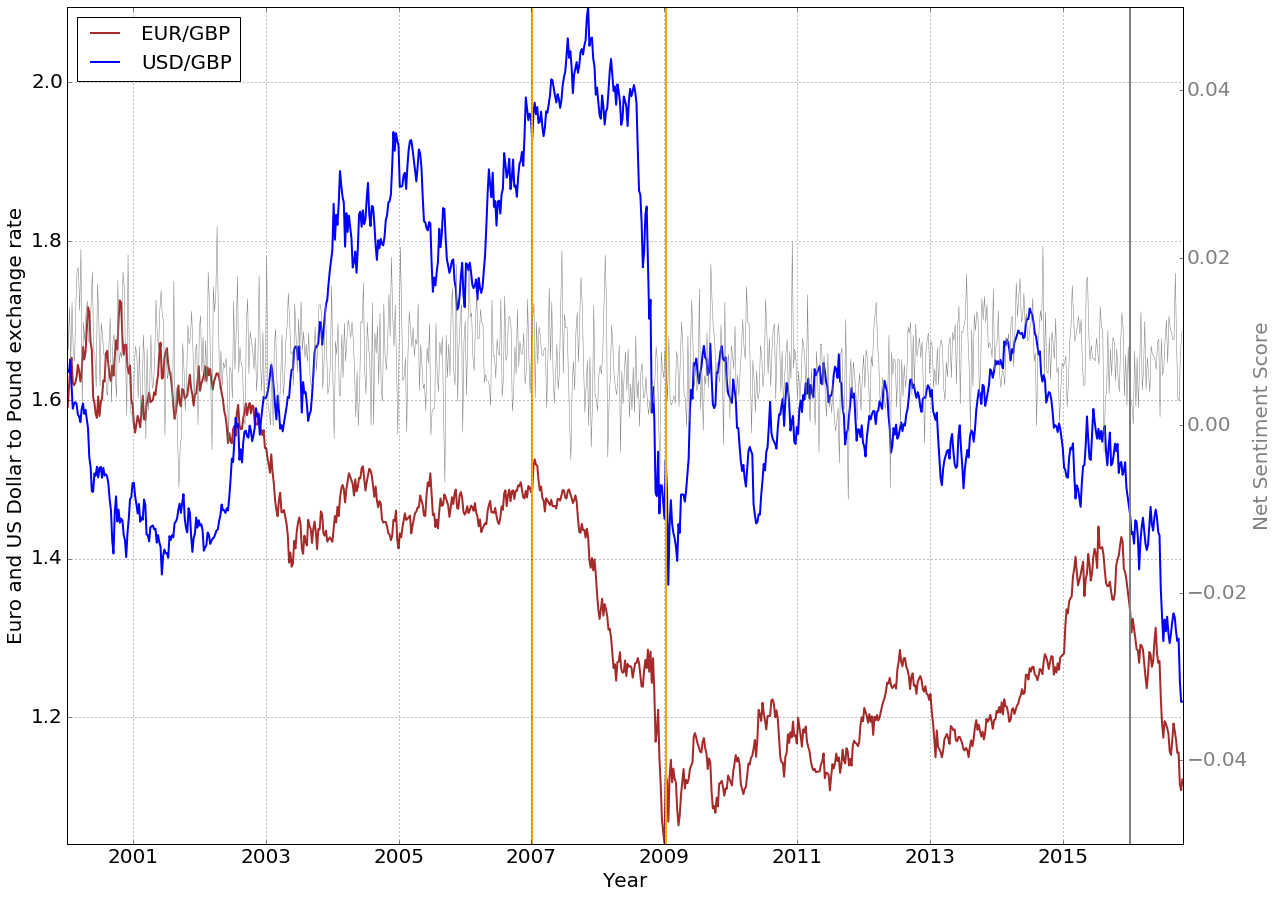

In [71]:
fig, ax1 = plt.subplots( figsize=(20,15))

ax1.plot(weekly_data['datetime'], weekly_data['XUDLERS'], 'brown', linewidth=2, label=str('EUR/GBP'))
ax1.plot(weekly_data['datetime'], weekly_data['XUDLUSS'], 'blue', linewidth=2, label=str('USD/GBP'))
ax1.legend(loc='best', fontsize=20)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Euro and US Dollar to Pound exchange rate', fontsize=20)
ax1.grid(True)
ax1.set_ylim([min(min(weekly_data['XUDLERS']),min(weekly_data['XUDLUSS'])),max(max(weekly_data['XUDLERS']),max(weekly_data['XUDLUSS']))])
ax1.axvline(x=datetime.datetime(2016,1,8), color='grey', linewidth=2)
ax1.axvline(x=datetime.datetime(2007,1,5), color='orange', linewidth=2)
ax1.axvline(x=datetime.datetime(2009,1,12), color='orange', linewidth=2)

ax2 = ax1.twinx()
ax2.plot(timestamp_weeks, avg_weekly_pos_minus_neg_score, 'grey',linewidth=0.5, label = 'Net weekly negative score')
ax2.set_ylabel('Net Sentiment Score', color='grey',fontsize=20)
ax2.set_ylim([-0.05,0.05])
for tl in ax2.get_yticklabels():
    tl.set_color('grey')

plt.show()

### Improving sentiment analysis using sentiwordnet
For variance reduction/ smoothing the sentiment scores, we take the running average of preceding ten weeks as our sentiment time series. Then there are visible trends between exchange rates and the net sentiments.

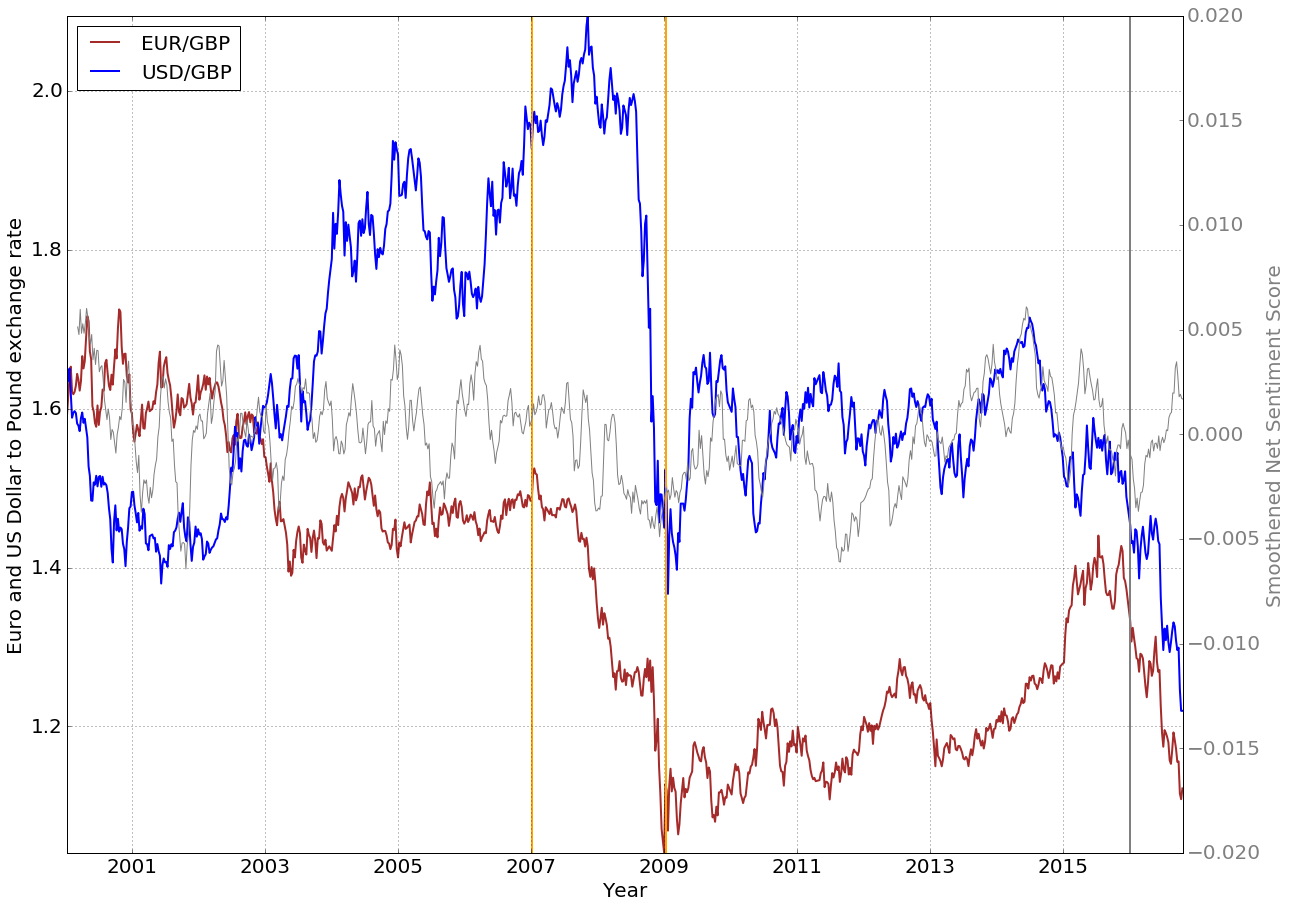

In [82]:
fig, ax1 = plt.subplots( figsize=(20,15))

ax1.plot(weekly_data['datetime'], weekly_data['XUDLERS'], 'brown', linewidth=2, label=str('EUR/GBP'))
ax1.plot(weekly_data['datetime'], weekly_data['XUDLUSS'], 'blue', linewidth=2, label=str('USD/GBP'))
ax1.legend(loc='best', fontsize=20)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Euro and US Dollar to Pound exchange rate', fontsize=20)
ax1.grid(True)
ax1.set_ylim([min(min(weekly_data['XUDLERS']),min(weekly_data['XUDLUSS'])),max(max(weekly_data['XUDLERS']),max(weekly_data['XUDLUSS']))])
ax1.axvline(x=datetime.datetime(2016,1,8), color='grey', linewidth=2)
ax1.axvline(x=datetime.datetime(2007,1,5), color='orange', linewidth=2)
ax1.axvline(x=datetime.datetime(2009,1,12), color='orange', linewidth=2)

avg_weekly_pos_minus_neg_score_centred = (avg_weekly_pos_minus_neg_score-np.mean(avg_weekly_pos_minus_neg_score))
avg_weekly_pos_minus_neg_score_smooth = [np.mean(avg_weekly_pos_minus_neg_score_centred[k-9:k+1]) for k in range(9,len(avg_weekly_pos_minus_neg_score_centred))]

ax2 = ax1.twinx()
ax2.plot(timestamp_weeks[9:], avg_weekly_pos_minus_neg_score_smooth, 'grey',linewidth=1, label = 'Net weekly negative score')
ax2.set_ylabel('Smoothened Net Sentiment Score', color='grey',fontsize=20)
ax2.set_ylim([-0.02,0.02])
for tl in ax2.get_yticklabels():
    tl.set_color('grey')

plt.show()

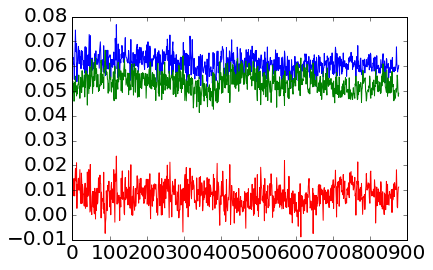

In [41]:
plt.plot(avg_weekly_pos_score, label = 'Average weekly positive score')
plt.plot(avg_weekly_neg_score, label = 'Average weekly negative score')
plt.plot(avg_weekly_pos_minus_neg_score, label = 'Average difference in weekly sentiment score')
plt.show()